In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup


Matplotlib is building the font cache; this may take a moment.


In [9]:


# Function to scrape player stats
def scrape_player_stats(season):
    url = f"https://www.basketball-reference.com/leagues/NBA_{season}_per_game.html"
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Failed to retrieve data: {response.status_code}")
        return None
    
    soup = BeautifulSoup(response.content, 'html.parser')
    table = soup.find('table', {'id': 'per_game_stats'})
    
    # Extract headers
    headers = [th.text for th in table.find('thead').find_all('th')][1:]  # Skip first empty column
    
    # Extract rows
    rows = table.find('tbody').find_all('tr')
    player_data = []
    for row in rows:
        if row.find('th', {'scope': 'row'}):  # Only extract player rows
            stats = [td.text for td in row.find_all('td')]
            player_data.append(stats)
    
    # Create a DataFrame
    df = pd.DataFrame(player_data, columns=headers)
    return df

# Scrape data for a specific season
season = 2025  # Example: 2022-2023 season
player_stats = scrape_player_stats(season)

# Save to CSV or display
if player_stats is not None:
    player_stats.to_csv(f"NBA_{season}_Player_Stats.csv", index=False)
    print(f"Data saved to NBA_{season}_Player_Stats.csv")
else:
    print("No data scraped.")


Data saved to NBA_2025_Player_Stats.csv


In [11]:
df = pd.read_csv(f"NBA_{season}_Player_Stats.csv")
df.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,Shai Gilgeous-Alexander,26.0,OKC,PG,44.0,44.0,34.4,11.3,21.4,0.528,...,0.9,4.4,5.3,6.0,2.1,1.1,2.7,2.2,32.1,NaN
1,Giannis Antetokounmpo,30.0,MIL,PF,37.0,37.0,34.8,12.5,20.7,0.602,...,2.2,9.8,12.0,5.8,0.7,1.4,3.5,2.4,31.4,NaN
2,Nikola Jokić,29.0,DEN,C,39.0,39.0,36.3,11.4,20.1,0.566,...,3.4,9.8,13.1,10.1,1.8,0.6,3.1,2.1,29.9,NaN
3,LaMelo Ball,23.0,CHO,PG,30.0,30.0,34.1,10.0,23.9,0.419,...,1.0,4.4,5.4,7.5,1.4,0.3,3.8,3.5,28.9,NaN
4,Luka Dončić,25.0,DAL,PG,22.0,22.0,35.7,9.8,21.2,0.464,...,0.7,7.6,8.3,7.8,2.0,0.4,3.4,2.6,28.1,NaN


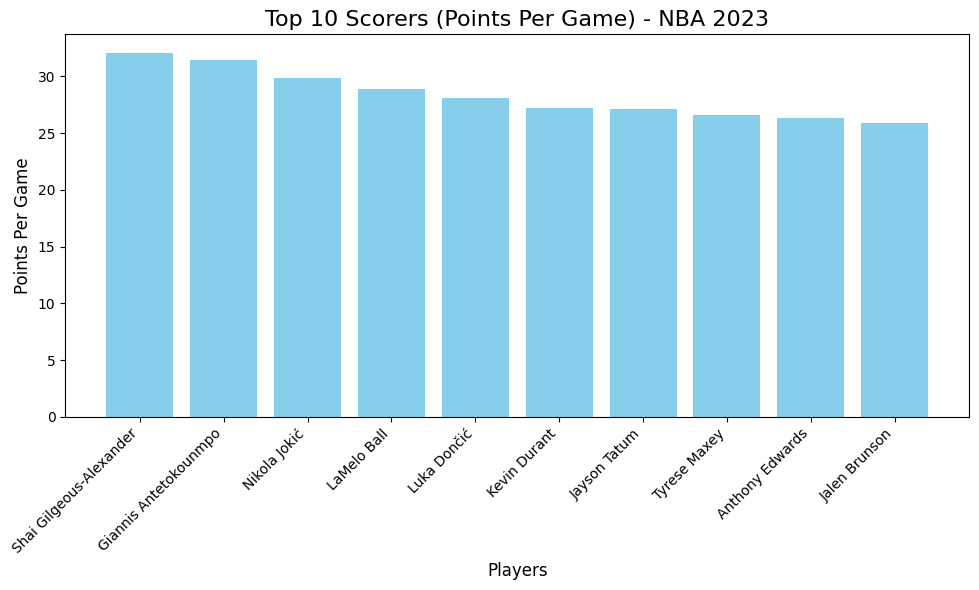

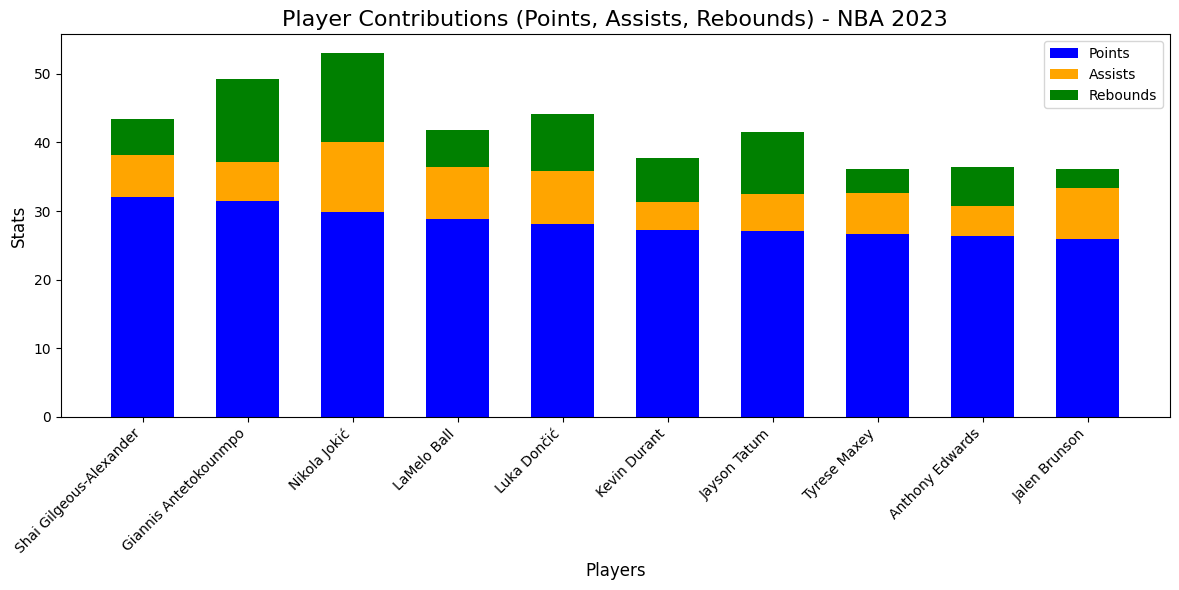

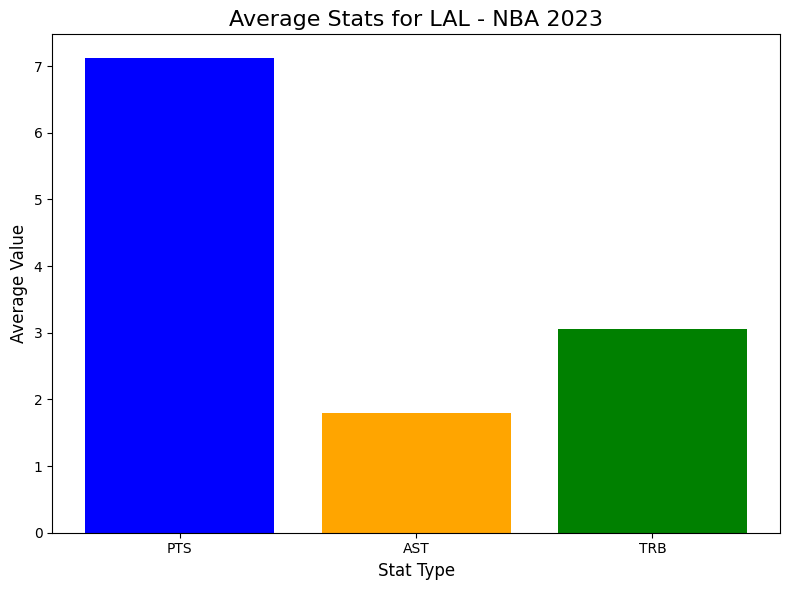

In [14]:
# Clean and preprocess the data
df['PTS'] = pd.to_numeric(df['PTS'], errors='coerce')  # Convert points column to numeric
df['AST'] = pd.to_numeric(df['AST'], errors='coerce')  # Assists
df['TRB'] = pd.to_numeric(df['TRB'], errors='coerce')  # Total rebounds
df = df.dropna(subset=['PTS', 'AST', 'TRB'])  # Drop rows with missing values

# Top 10 scorers by points per game
top_scorers = df.nlargest(10, 'PTS')

# Visualization 1: Top Scorers Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(top_scorers['Player'], top_scorers['PTS'], color='skyblue')
plt.title("Top 10 Scorers (Points Per Game) - NBA 2025", fontsize=16)
plt.xlabel("Players", fontsize=12)
plt.ylabel("Points Per Game", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualization 2: Stacked Bar Chart (Points, Assists, Rebounds)
subset_players = df[df['Player'].isin(top_scorers['Player'])]

plt.figure(figsize=(12, 6))
bar_width = 0.6
x = range(len(subset_players))

plt.bar(x, subset_players['PTS'], width=bar_width, label='Points', color='blue')
plt.bar(x, subset_players['AST'], width=bar_width, bottom=subset_players['PTS'], label='Assists', color='orange')
plt.bar(x, subset_players['TRB'], width=bar_width, bottom=subset_players['PTS'] + subset_players['AST'], label='Rebounds', color='green')

plt.title("Player Contributions (Points, Assists, Rebounds) - NBA 2025", fontsize=16)
plt.xlabel("Players", fontsize=12)
plt.ylabel("Stats", fontsize=12)
plt.xticks(x, subset_players['Player'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Visualization 3: Average Stats for a Single Team
team_name = "LAL"  # Example: Los Angeles Lakers (replace with your desired team)
team_stats = df[df['Team'] == team_name][['PTS', 'AST', 'TRB']].mean()

plt.figure(figsize=(8, 6))
plt.bar(team_stats.index, team_stats.values, color=['blue', 'orange', 'green'])
plt.title(f"Average Stats for {team_name} - NBA 2025", fontsize=16)
plt.xlabel("Stat Type", fontsize=12)
plt.ylabel("Average Value", fontsize=12)
plt.tight_layout()
plt.show()


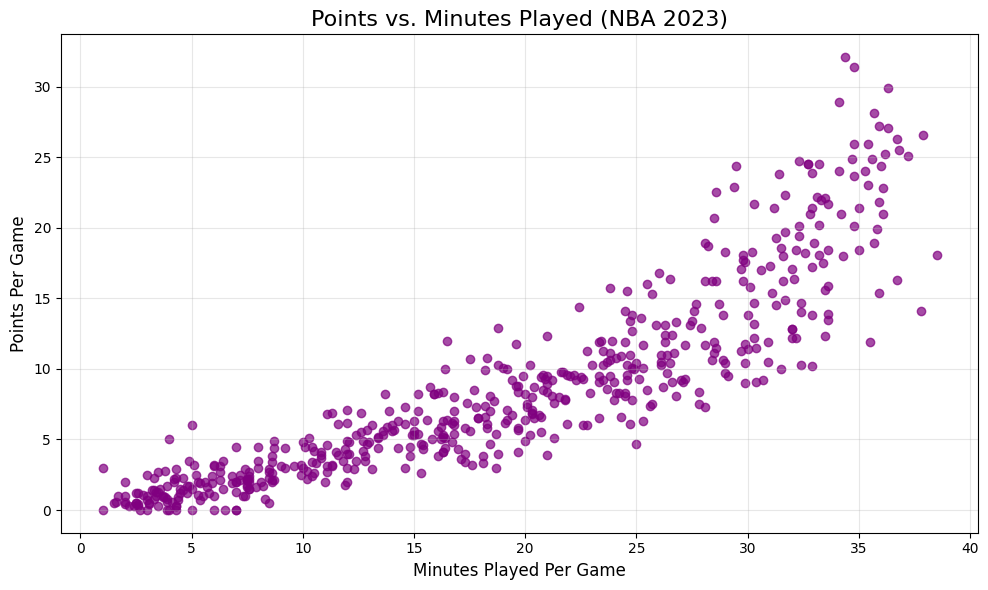

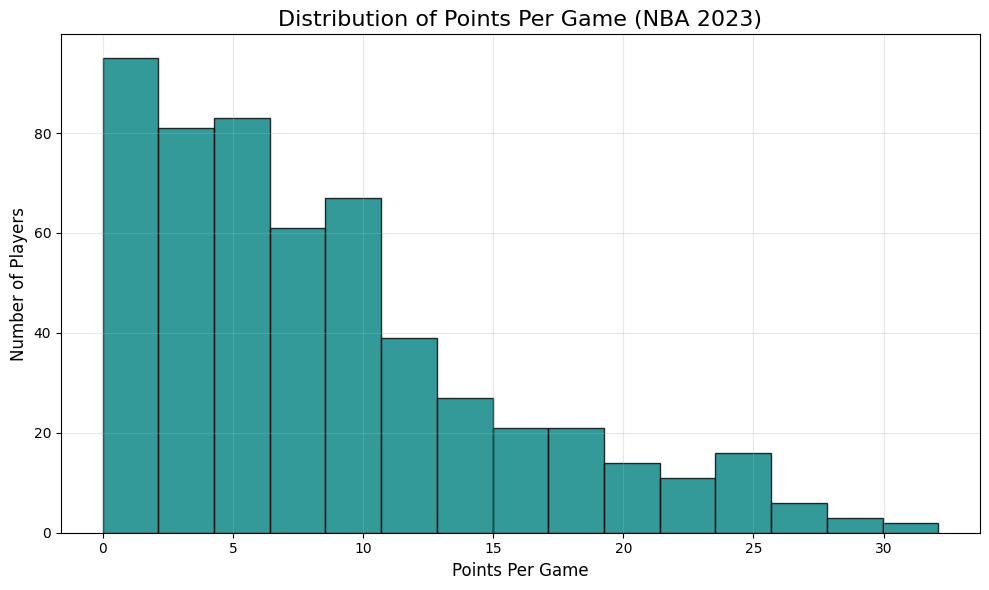

<Figure size 1000x600 with 0 Axes>

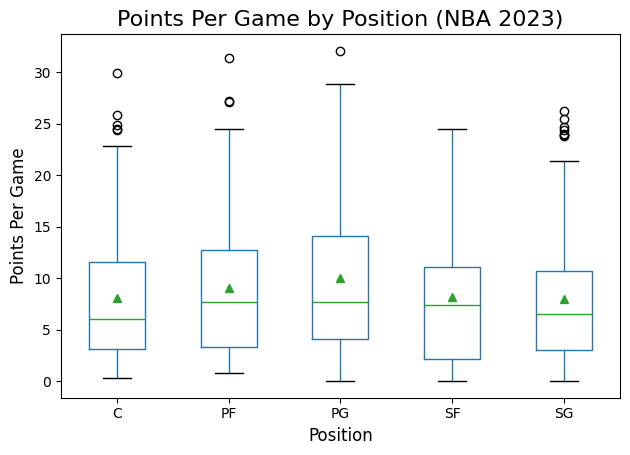

In [ ]:
# Scatterplot: Points vs. Minutes Played
plt.figure(figsize=(10, 6))
plt.scatter(df['MP'], df['PTS'], alpha=0.7, color='purple')
plt.title("Points vs. Minutes Played (NBA 2025)", fontsize=16)
plt.xlabel("Minutes Played Per Game", fontsize=12)
plt.ylabel("Points Per Game", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Histogram: Distribution of Points Per Game
plt.figure(figsize=(10, 6))
plt.hist(df['PTS'], bins=15, color='teal', edgecolor='black', alpha=0.8)
plt.title("Distribution of Points Per Game (NBA 2025)", fontsize=16)
plt.xlabel("Points Per Game", fontsize=12)
plt.ylabel("Number of Players", fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Box Plot: Points Distribution by Position
if 'Pos' in df.columns:  # Ensure position column exists
    plt.figure(figsize=(10, 6))
    df.boxplot(column='PTS', by='Pos', grid=False, showmeans=True)
    plt.title("Points Per Game by Position (NBA 2025)", fontsize=16)
    plt.suptitle("")  # Remove default subplot title
    plt.xlabel("Position", fontsize=12)
    plt.ylabel("Points Per Game", fontsize=12)
    plt.tight_layout()
    plt.show()


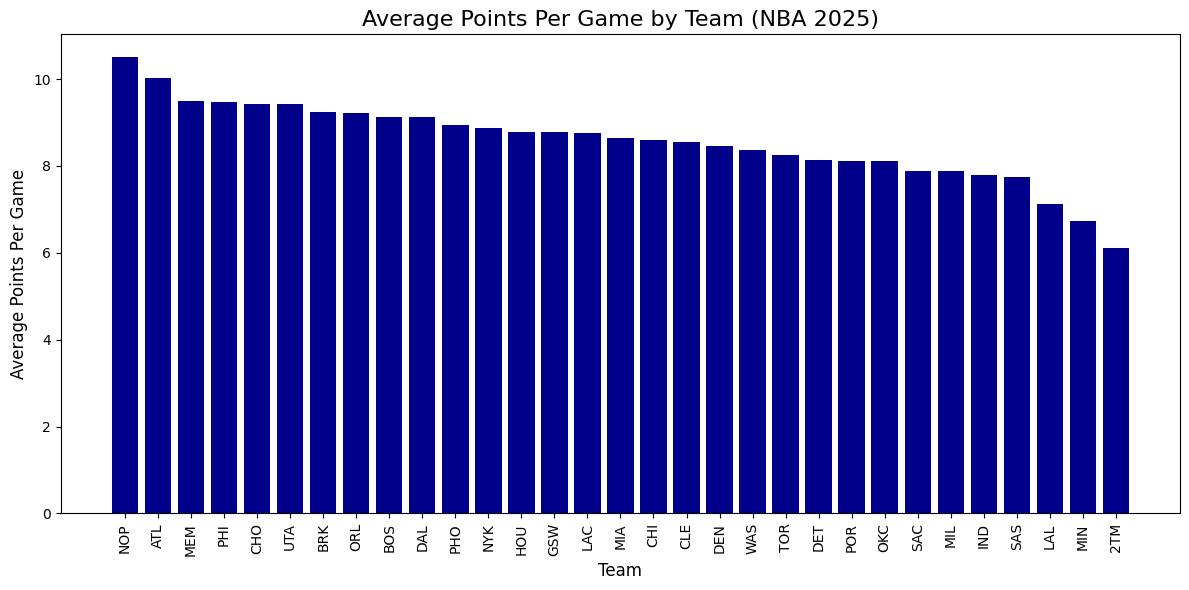

In [25]:
# Team-Level Average Stats
team_stats = df.groupby('Team')[['PTS', 'AST', 'TRB']].mean().sort_values('PTS', ascending=False)

# total_team_ppg = df.groupby('Team')['PTS'].sum().sort_values(ascending=False)

# print(total_team_ppg)

# Bar Chart: Average Points Per Game by Team
plt.figure(figsize=(12, 6))
plt.bar(team_stats.index, team_stats['PTS'], color='darkblue')
plt.title("Average Points Per Game by Team (NBA 2025)", fontsize=16)
plt.xlabel("Team", fontsize=12)
plt.ylabel("Average Points Per Game", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [28]:
# Create Advanced Metrics
df['Points Per Minute'] = df['PTS'] / df['MP']
df['Assist Turnover Ratio'] = df['AST'] / (df['TOV'] + 1e-9)  # Avoid division by zero
df['Efficiency'] = (df['PTS'] + df['TRB'] + df['AST'] - df['TOV']) / df['MP']

# Preview Engineered Features
print(df[['Player', 'PTS', 'MP', 'Points Per Minute', 'Assist Turnover Ratio', 'Efficiency']].head())


                    Player   PTS    MP  Points Per Minute  \
0  Shai Gilgeous-Alexander  32.1  34.4           0.933140   
1    Giannis Antetokounmpo  31.4  34.8           0.902299   
2             Nikola Jokić  29.9  36.3           0.823691   
3              LaMelo Ball  28.9  34.1           0.847507   
4              Luka Dončić  28.1  35.7           0.787115   

   Assist Turnover Ratio  Efficiency  
0               2.222222    1.183140  
1               1.657143    1.313218  
2               3.258065    1.377410  
3               1.973684    1.114370  
4               2.294118    1.142857  
